<a href="https://colab.research.google.com/github/ChouNguyen/keras/blob/master/%5BAutoencoder%5DConvolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
print(tf.__version__)

2.0.0


In [0]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
import numpy as np

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

X_train = X_train.reshape(len(X_train), 28, 28, 1)
X_test = X_test.reshape(len(X_test), 28, 28, 1)

print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [0]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras import Model

In [0]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [0]:
autoencoder.fit(X_train, X_train,
               epochs=50,
               batch_size=128,
               shuffle=True,
               validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 10s 162us/sample - loss: 0.2062 - val_loss: 0.1469
Epoch 2/50
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1366 - val_loss: 0.1282
Epoch 3/50
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1255 - val_loss: 0.1216
Epoch 4/50
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1191 - val_loss: 0.1152
Epoch 5/50
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1149 - val_loss: 0.1120
Epoch 6/50
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1121 - val_loss: 0.1108
Epoch 7/50
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1101 - val_loss: 0.1077
Epoch 8/50
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1084 - val_loss: 0.1065
Epoch 9/50
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1070 - va

In [0]:
decoded_imgs = autoencoder.predict(X_test)

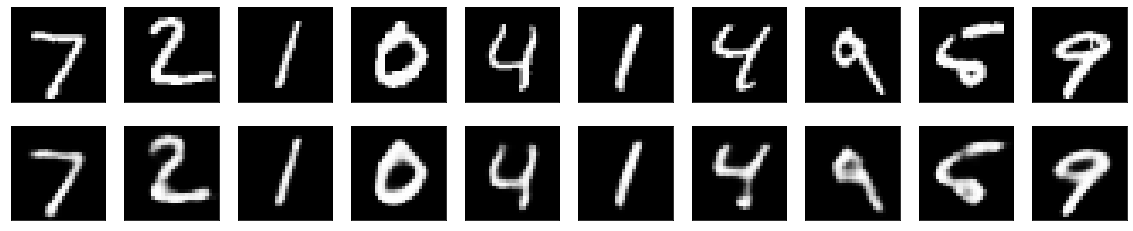

In [0]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()